In [0]:
import tensorflow
tensorflow.__version__

'2.2.0'

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/capstone project')

In [0]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
tickets_df = pd.read_excel('input_data.xlsx')
print(tickets_df.shape)


(8500, 4)


In [0]:
tickets_df.head()

Short description  ... Assignment group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 4 columns]

In [0]:
tickets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [0]:
(tickets_df.isna() == True).sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [0]:
#tickets_df = tickets_df.astype(str)
convert_dict = {
    'Short description':str,
    'Description':str,
    'Caller':str,
    'Assignment group':str,
}
tickets_df = tickets_df.astype(convert_dict)

In [0]:

tickets_df.head()

Short description  ... Assignment group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 4 columns]

In [0]:
# Total number of words in the corpus
tickets_df['RawDescription'] = tickets_df['Short description'].str.cat(tickets_df['Description'], sep=' ', na_rep=' ')
tickets_df.head()

Short description  ...                                     RawDescription
0                    login issue  ...  login issue -verified user details.(employee# ...
1                        outlook  ...  outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2             cant log in to vpn  ...  cant log in to vpn \r\n\r\nreceived from: eylq...
3  unable to access hr_tool page  ...  unable to access hr_tool page unable to access...
4                   skype error   ...                          skype error  skype error 

[5 rows x 5 columns]

In [0]:

tickets_df['RawWordCount'] = [len(desc.split(' ')) for desc in tickets_df['RawDescription']]
tickets_df.head()
wordCount_before = tickets_df['RawWordCount'].sum()

In [0]:

print("Total Corpus Word Count: ", wordCount_before)

Total Corpus Word Count:  307607


In [0]:
tickets_df.head()

Short description  ... RawWordCount
0                    login issue  ...           31
1                        outlook  ...           24
2             cant log in to vpn  ...           14
3  unable to access hr_tool page  ...           10
4                   skype error   ...            6

[5 rows x 6 columns]

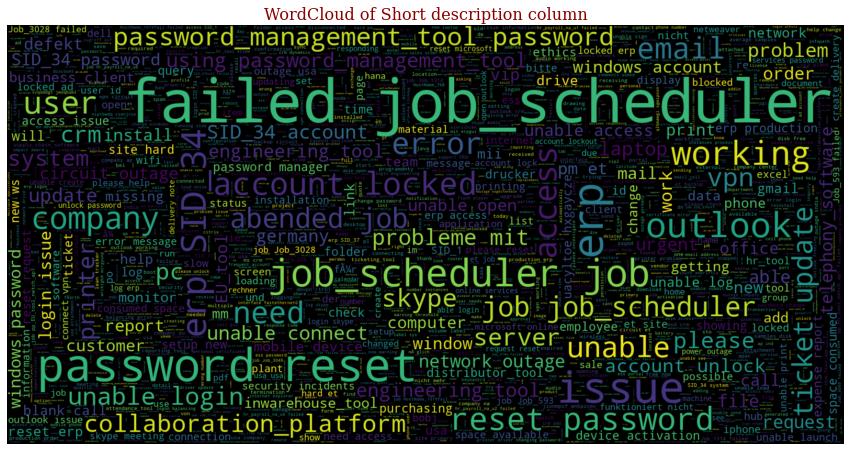

In [0]:
#Visualization
#Word Clould of "Short descrition" Column
font = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,}

All_words = ""
All_words = " ".join(tickets_df['Short description'])
wordcloud = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(All_words)
# width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Short description column", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

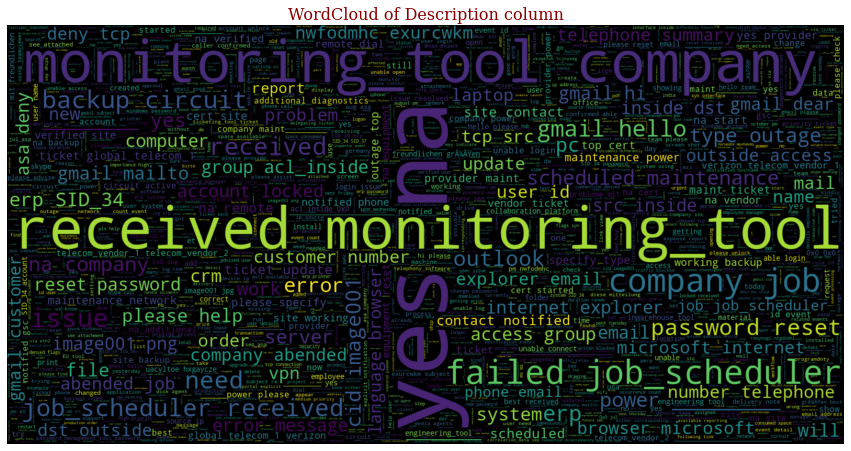

In [0]:
#Word Cloud of raw "Description" Column
All_words = ""
All_words += " ".join(tickets_df.Description)
wordcloud = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(All_words) 
# width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Description column", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

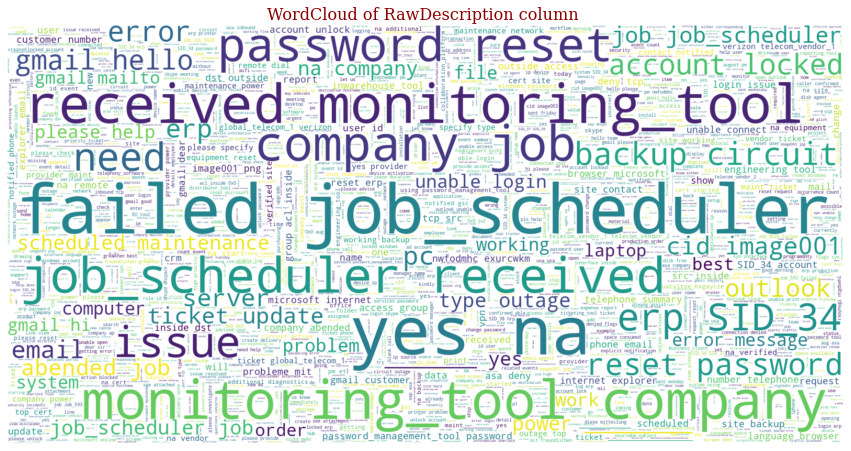

In [0]:
#Word Cloud of complete raw data of the Corpus - "RawDescription"
All_words = ""
All_words += " ".join(tickets_df.RawDescription)
wordcloud = WordCloud(background_color='white',max_words = 2000 , width = 1600 , height = 800).generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of RawDescription column ", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

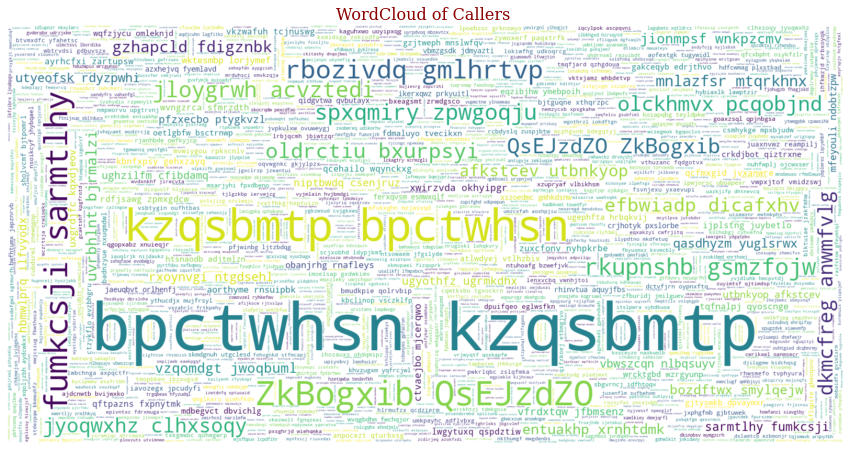

In [0]:
#WordCloud of Callers
all_callers = ""
all_callers += " ".join(tickets_df.Caller)
wordcloud = WordCloud(background_color='white', max_words = 2000 , width = 1600 , height = 800).generate(all_callers) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Callers ", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

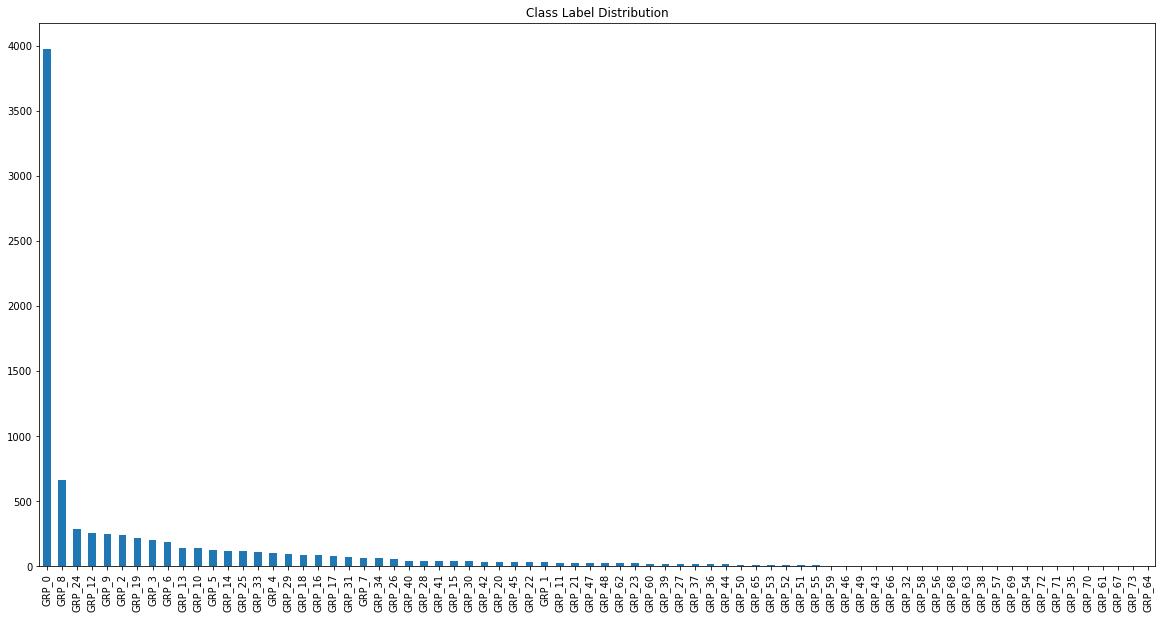

In [0]:
tickets_df['Assignment group'].value_counts().plot(kind='bar', figsize=(20,10), title='Class Label Distribution')

In [0]:
# Save the image in the img folder:
wordcloud.to_file("first_review.png")

Data Preprocessing

In [0]:
def removeString(data, regex):
    return data.str.lower().str.replace(regex.lower(), ' ')

In [0]:
def cleanDataset(dataset, columnsToClean, regexList):
    for column in columnsToClean:
        for regex in regexList:
            dataset[column] = removeString(dataset[column], regex)
    return dataset

In [0]:
# TBD : remove Disclaimer

def getRegexList():
    '''
    Adding regex list as per the given data set to flush off the unnecessary text
    
    '''
    regexList = []
    regexList += ['From:(.*)\r\n']  # from line
    regexList += ['Sent:(.*)\r\n']  # sent to line
    regexList += ['received from:(.*)\r\n']  # received data line
    regexList += ['received']  # received data line
    regexList += ['To:(.*)\r\n']  # to line
    regexList += ['CC:(.*)\r\n']  # cc line
    regexList += ['(.*)infection']  # footer
    regexList += ['\[cid:(.*)]']  # images cid
    regexList += ['https?:[^\]\n\r]+']  # https & http
    regexList += ['Subject:']
    regexList += ['[\w\d\-\_\.]+@[\w\d\-\_\.]+']  # emails are not required
    regexList += ['[0-9][\-0–90-9 ]+']  # phones are not required
    regexList += ['[0-9]']  # numbers not needed
    regexList += ['[^a-zA-z 0-9]+']  # anything that is not a letter
    regexList += ['[\r\n]']  # \r\n
    regexList += [' [a-zA-Z] ']  # single letters makes no sense
    regexList += [' [a-zA-Z][a-zA-Z] ']  # two-letter words makes no sense
    regexList += ["  "]  # double spaces
    
    regexList += ['^[_a-z0-9-]+(\.[_a-z0-9-]+)*@[a-z0-9-]+(\.[a-z0-9-]+)*(\.[a-z]{2,4})$']
    regexList += ['[\w\d\-\_\.]+ @ [\w\d\-\_\.]+']
    regexList += ['Subject:']
    regexList += ['[^a-zA-Z]']

    return regexList

Remove text with Regex

In [0]:
tickets_df['CleanDescription'] = tickets_df['RawDescription']
# Select columns for cleaning
columnsToClean = ['CleanDescription']

# Create list of regex to remove sensitive data
# Clean dataset and remove sensitive data
clean_tickets_df = cleanDataset(tickets_df, columnsToClean, getRegexList())

In [0]:
clean_tickets_df.shape

(8500, 7)

In [0]:
clean_tickets_df.head(10)

Short description  ...                                   CleanDescription
0                                        login issue  ...  login issue verified user details employee  ma...
1                                            outlook  ...  outlook   hello team meetings skype meetings e...
2                                 cant log in to vpn  ...          cant log to vpn   cannot log to vpn best 
3                      unable to access hr_tool page  ...    unable access tool page unable access tool page
4                                       skype error   ...                           skype error skype error 
5     unable to log in to engineering tool and skype  ...  unable log to engineering tool and skype unabl...
6  event: critical:HostName_221.company.com the v...  ...  event critical hostname  company com the value...
7  ticket_no1550391- employment status - new non-...  ...  ticket employment status  new non employee ent...
8               unable to disable add ins on outlook  ...  unable disable add ins outlook unable disable ...
9                    ticket update on inplant_874773  ...       ticket update inplant ticket update inplant 

[10 rows x 7 columns]

NLP Essentials : Stopwords Removal & Text Normalization (Lemmetization)

Remove Stopwords
Text Classification
Spam Filtering
Language Classification
Genre Classification
Caption Generation
Auto-Tag Generation
Avoid Stopword Removal
Machine Translation
Language Modeling
Text Summarization
Question-Answering problems (Chatbots)

In [0]:

import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
# We will not do stemming, instead use more intelligent way to get the root word using  lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
stop_words = set(stopwords.words('english'))

#nltk.download('wordnet')

In [0]:
nltk.download('wordnet')
nltk.download('punkt')
processed_all_documents = list()

for desc in clean_tickets_df['CleanDescription']:
    word_tokens = word_tokenize(desc) 
    
    filtered_sentence = [] 

    # Removing Stopwords
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    # Lemmetization
    lemma_word = []
    wordnet_lemmatizer = WordNetLemmatizer()
    for w in filtered_sentence:
        word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
        word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
        word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
        lemma_word.append(word3)
    words = ' '.join(lemma_word)
    processed_all_documents.append(words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:

len(processed_all_documents)

8500

In [0]:

clean_tickets_df['CleanDescription'] = processed_all_documents

In [0]:
clean_tickets_df['CleanWordCount'] = [len(desc.split(' ')) for desc in clean_tickets_df['CleanDescription']]

wordCount_after = clean_tickets_df['CleanWordCount'].sum()
print("Total Words After StopWords Removal & Lemmetization: ", wordCount_after)
print("Max word count of a Document: ", clean_tickets_df['CleanWordCount'].max())
print("Mean word count of Documents: ", clean_tickets_df['CleanWordCount'].mean())

Total Words After StopWords Removal & Lemmetization:  181210
Max word count of a Document:  876
Mean word count of Documents:  21.318823529411766


In [0]:
clean_tickets_df.head()

Short description  ... CleanWordCount
0                    login issue  ...             24
1                        outlook  ...             15
2             cant log in to vpn  ...              6
3  unable to access hr_tool page  ...              8
4                   skype error   ...              4

[5 rows x 8 columns]

In [0]:
print("Difference in Total WordCount Before & After Data Preprocessing: ", (wordCount_before - wordCount_after))

Difference in Total WordCount Before & After Data Preprocessing:  126397


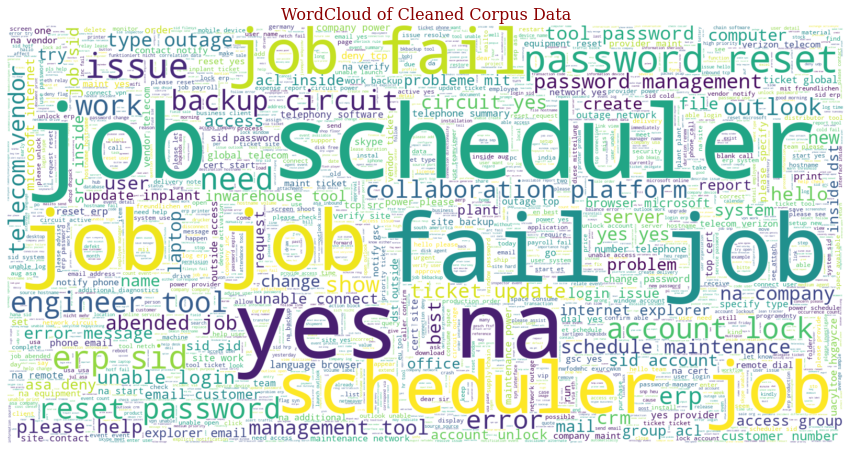

In [0]:
#WordCloud of Cleaned Preprocessed Corpus Data
All_words = ""
All_words += " ".join(tickets_df.CleanDescription)
wordcloud = WordCloud(background_color='white', max_words = 2000 , width = 1600 , height = 800).generate(All_words) 
plt.figure(figsize=(15,15))
plt.title("WordCloud of Cleaned Corpus Data", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Observation : We have 74 labels for classification. There are few categories with very few tickets. It might make sense to consider only those categories with atleast 20 representations. Else our noise levels will be high

In [0]:
group_frequency = dict(clean_tickets_df['Assignment group'].value_counts())

In [0]:
group_df = pd.DataFrame.from_dict(group_frequency, orient='index', columns=['frequency'])
group_df['percent representation'] = group_df['frequency'] / group_df['frequency'].sum()
group_df['cumulative percentage'] = group_df['percent representation'].cumsum(axis = 0)
group_df.head(35)

frequency  percent representation  cumulative percentage
GRP_0        3976                0.467765               0.467765
GRP_8         661                0.077765               0.545529
GRP_24        289                0.034000               0.579529
GRP_12        257                0.030235               0.609765
GRP_9         252                0.029647               0.639412
GRP_2         241                0.028353               0.667765
GRP_19        215                0.025294               0.693059
GRP_3         200                0.023529               0.716588
GRP_6         184                0.021647               0.738235
GRP_13        145                0.017059               0.755294
GRP_10        140                0.016471               0.771765
GRP_5         129                0.015176               0.786941
GRP_14        118                0.013882               0.800824
GRP_25        116                0.013647               0.814471
GRP_33        107                0.012588               0.827059
GRP_4         100                0.011765               0.838824
GRP_29         97                0.011412               0.850235
GRP_18         88                0.010353               0.860588
GRP_16         85                0.010000               0.870588
GRP_17         81                0.009529               0.880118
GRP_31         69                0.008118               0.888235
GRP_7          68                0.008000               0.896235
GRP_34         62                0.007294               0.903529
GRP_26         56                0.006588               0.910118
GRP_40         45                0.005294               0.915412
GRP_28         44                0.005176               0.920588
GRP_41         40                0.004706               0.925294
GRP_15         39                0.004588               0.929882
GRP_30         39                0.004588               0.934471
GRP_42         37                0.004353               0.938824
GRP_20         36                0.004235               0.943059
GRP_45         35                0.004118               0.947176
GRP_22         31                0.003647               0.950824
GRP_1          31                0.003647               0.954471
GRP_11         30                0.003529               0.958000

In [0]:
#for 95th percentile, 31 is our magic number 

group_frequency_filtered = dict(filter(lambda x: x[1] >= 31, group_frequency.items()))
print (group_frequency_filtered)

{'GRP_0': 3976, 'GRP_8': 661, 'GRP_24': 289, 'GRP_12': 257, 'GRP_9': 252, 'GRP_2': 241, 'GRP_19': 215, 'GRP_3': 200, 'GRP_6': 184, 'GRP_13': 145, 'GRP_10': 140, 'GRP_5': 129, 'GRP_14': 118, 'GRP_25': 116, 'GRP_33': 107, 'GRP_4': 100, 'GRP_29': 97, 'GRP_18': 88, 'GRP_16': 85, 'GRP_17': 81, 'GRP_31': 69, 'GRP_7': 68, 'GRP_34': 62, 'GRP_26': 56, 'GRP_40': 45, 'GRP_28': 44, 'GRP_41': 40, 'GRP_15': 39, 'GRP_30': 39, 'GRP_42': 37, 'GRP_20': 36, 'GRP_45': 35, 'GRP_22': 31, 'GRP_1': 31}


In [0]:
# Lets now filter the data frame and retain only the necessary groups(Filtered)
valid_grp_list = list(group_frequency_filtered)
# eliminate
clean_tickets_df = clean_tickets_df[clean_tickets_df['Assignment group'].isin(valid_grp_list)]
clean_tickets_df.head(10)

Short description  ... CleanWordCount
0                                        login issue  ...             24
1                                            outlook  ...             15
2                                 cant log in to vpn  ...              6
3                      unable to access hr_tool page  ...              8
4                                       skype error   ...              4
5     unable to log in to engineering tool and skype  ...             10
6  event: critical:HostName_221.company.com the v...  ...             27
7  ticket_no1550391- employment status - new non-...  ...             18
8               unable to disable add ins on outlook  ...             10
9                    ticket update on inplant_874773  ...              6

[10 rows x 8 columns]

In [0]:
clean_tickets_df['Assignment group'].value_counts().sum()

8113

In [0]:
len(clean_tickets_df['Assignment group'].value_counts())

34

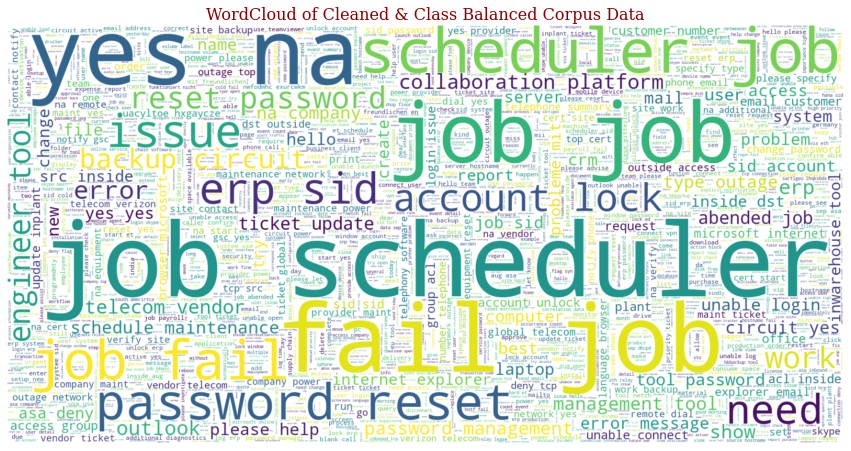

In [0]:
#WordCloud of Cleaned & Class Balanced Corpus Data after dropping poorly represented classes
All_words = ""
All_words += " ".join(tickets_df.CleanDescription)
wordcloud = WordCloud(background_color='white', max_words = 2000 , width = 1600 , height = 800).generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Cleaned & Class Balanced Corpus Data", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Number of classes reduced from 74 to 34, rows corresponding to the weakly represented classes are dropped

Number of records reduced from 8500 to 8113

In [0]:
#Label Encode the Target Column
le = preprocessing.LabelEncoder()
clean_tickets_df["LabelEncodings"] = le.fit_transform(clean_tickets_df["Assignment group"])
y_classes_len = len(le.classes_)
le.classes_
print(y_classes_len)

34


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
clean_tickets_df.head(10)

Short description  ... LabelEncodings
0                                        login issue  ...              0
1                                            outlook  ...              0
2                                 cant log in to vpn  ...              0
3                      unable to access hr_tool page  ...              0
4                                       skype error   ...              0
5     unable to log in to engineering tool and skype  ...              0
6  event: critical:HostName_221.company.com the v...  ...              1
7  ticket_no1550391- employment status - new non-...  ...              0
8               unable to disable add ins on outlook  ...              0
9                    ticket update on inplant_874773  ...              0

[10 rows x 9 columns]

In [0]:
#Creating Tf-Idf vectors for ticket descriptions


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report

In [0]:
y = np.asarray(clean_tickets_df['LabelEncodings'])

In [0]:
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(clean_tickets_df['CleanDescription'])
print(x_train_counts.shape)
#print(count_vect.vocabulary_)

(8113, 11350)


In [0]:
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
print(x_train_tfidf.shape)

(8113, 11350)


In [0]:
train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, y, test_size=0.3)

In [0]:
print(len(count_vect.vocabulary_))

11350


In [0]:

train_x.shape



(5679, 11350)

In [0]:
train_y.shape

(5679,)

In [0]:
test_x.shape

(2434, 11350)

In [0]:
test_y.shape

(2434,)

In [0]:
train_x[0]

<1x11350 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [0]:
#Machine Learning Models

compare_results = pd.DataFrame(columns=['Algorithm Name', 'Accuracy', 'F1 Score'])

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(train_x, train_y)
y_pred = clf.predict(test_x)
acc_score = accuracy_score(test_y, y_pred)
print("Logistic Regression Score: ", acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted', labels=np.unique(y_pred))
print("Logistic Regression F1 Score: ", f_sc)

Logistic Regression Score:  0.6581758422350041
Logistic Regression F1 Score:  0.6158893627604665


In [0]:
compare_results = compare_results.append({'Algorithm Name': 'Logistic Regression', 'Accuracy': acc_score,'F1 Score': f_sc}, ignore_index=True)

In [0]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(train_x, train_y)
y_pred = clf.predict(test_x)
acc_score = accuracy_score(test_y, y_pred)
print("Naive Bayes Score: ", acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted', labels=np.unique(y_pred))
print("Naive Bayes F1 Score: ", f_sc)

Naive Bayes Score:  0.5842235004108464
Naive Bayes F1 Score:  0.6639955721224966


In [0]:
compare_results = compare_results.append({'Algorithm Name': 'Naive Bayes','Accuracy':acc_score, 'F1 Score': f_sc}, ignore_index=True)

In [0]:
from sklearn.svm import SVC
clf = SVC(kernel='linear').fit(train_x, train_y)
y_pred = clf.predict(test_x)
acc_score = accuracy_score(test_y, y_pred)
print("SVM-Linerar Score: ", acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted', labels=np.unique(y_pred))
print("SVM F1 Score: ", f_sc)

SVM-Linerar Score:  0.6943303204601479
SVM F1 Score:  0.6731156188942838


In [0]:
compare_results = compare_results.append({'Algorithm Name': 'Linear-SVM','Accuracy':acc_score, 'F1 Score': f_sc}, ignore_index=True)

In [0]:
from sklearn.tree import DecisionTreeClassifier
model_entropy = DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(train_x, train_y)
model_entropy.score(train_x, train_y) # performance on train data - supposed to overfit

0.9491107589364325

In [0]:
model_entropy.score(test_x, test_y)  # performance on test data

0.6031224322103533

In [0]:
# Pruned Decision Trees
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(train_x, train_y)
preds_pruned = clf_pruned.predict(test_x)
preds_pruned_train = clf_pruned.predict(train_x)

In [0]:
acc_score = accuracy_score(test_y,preds_pruned)
print("Test results: ", acc_score)
print("Train results: ", accuracy_score(train_y,preds_pruned_train))

Test results:  0.5780608052588332
Train results:  0.5698186300405


In [0]:
f_sc = f1_score(test_y, preds_pruned, average='weighted', labels=np.unique(preds_pruned))
print("Decision Tree F1 Score: ", f_sc)

Decision Tree F1 Score:  0.701178016240488


In [0]:
compare_results = compare_results.append({'Algorithm Name': 'Decision Trees','Accuracy':acc_score, 'F1 Score': f_sc}, ignore_index=True)


In [0]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=150, random_state=100, bootstrap=False)
rfcl = rfcl.fit(train_x, train_y)
pred_RF = rfcl.predict(test_x)
acc_RF = accuracy_score(test_y, pred_RF)
print(acc_RF)

0.6955628594905505


In [0]:
f_sc = f1_score(test_y, pred_RF, average='weighted', labels=np.unique(pred_RF))
print("Random F1 Score: ", f_sc)

Random F1 Score:  0.6563553380278122


In [0]:
compare_results = compare_results.append({'Algorithm Name': 'Random Forests','Accuracy':acc_RF, 'F1 Score': f_sc}, ignore_index=True)

In [0]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(train_x, train_y)
pred_AB =abcl.predict(test_x)
acc_AB = accuracy_score(test_y, pred_AB)

print("AdaBoost accuracy: ", acc_AB)

AdaBoost accuracy:  0.5497124075595727


In [0]:
f_sc = f1_score(test_y, pred_AB, average='weighted', labels=np.unique(pred_AB))
print("AdaBoosting Score: ", f_sc)

AdaBoosting Score:  0.5861776437858996


In [0]:
compare_results = compare_results.append({'Algorithm Name': 'AdaBoosting','Accuracy': acc_AB, 'F1 Score': f_sc}, ignore_index=True)

In [0]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=150, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(train_x, train_y)
pred_BG =bgcl.predict(test_x)
acc_BG = accuracy_score(test_y, pred_BG)
print(acc_BG)

0.6754313886606409


In [0]:
f_sc = f1_score(test_y, pred_BG, average='weighted', labels=np.unique(pred_BG))
print("Bagging Score: ", f_sc)

Bagging Score:  0.6434440084948346


In [0]:
compare_results = compare_results.append({'Algorithm Name': 'Bagging', 'Accuracy': acc_BG,  'F1 Score': f_sc}, ignore_index=True)

In [0]:
compare_results.sort_values(by='Accuracy', ascending=False)

Algorithm Name  Accuracy  F1 Score
3       Random Forests  0.695563  0.656355
1           Linear-SVM  0.694330  0.673116
5              Bagging  0.675431  0.643444
0  Logistic Regression  0.658176  0.615889
2       Decision Trees  0.578061  0.701178
4          AdaBoosting  0.549712  0.586178

In [0]:
from sklearn.model_selection import GridSearchCV, train_test_split